In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
'''Pandas is an open-source Python library designed for data manipulation and analysis, widely used in data science. 
It provides two primary data structures: Series, a one-dimensional labeled array, and DataFrame, a two-dimensional labeled 
data structure resembling a table. Pandas allows for easy data cleaning, filtering, aggregation, and merging, and supports 
various file formats like CSV, Excel, and SQL databases. Its intuitive syntax simplifies tasks such as data analysis and 
exploratory data analysis (EDA). Pandas is often used alongside visualization libraries like Matplotlib and Seaborn, making 
it a popular choice among data analysts and scientists.'''

#import data
data=pd.read_csv('uber.csv')
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
#preprocessing:
data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])

# Extract year, month, day, and hour from 'pickup_datetime'
data['year'] = data['pickup_datetime'].dt.year
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.day
data['hour'] = data['pickup_datetime'].dt.hour

data.drop(columns=['pickup_datetime','Unnamed: 0'],inplace=True)

#find count of missing values
print(f'missing values are :\n{data.isnull().sum()}\n')

#drop missing value records
data.dropna(inplace=True)

# To fill missing values with the mean value of the column:
# data.fillna(data.mean(), inplace=True)

#confirm all missing values are removed
print(f"missing values are :\n{data.isnull().sum()}" )


missing values are :
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
year                 0
month                0
day                  0
hour                 0
dtype: int64

missing values are :
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
dtype: int64


In [4]:
data

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10
199996,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1
199997,2009-06-29 00:42:00.00000078,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0
199998,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14


In [5]:
'''Seaborn is an open-source Python data visualization library built on Matplotlib, designed to create attractive and 
informative statistical graphics. It simplifies the process of visualizing complex datasets by providing high-level 
functions for various types of plots, including scatter plots, bar plots, and violin plots. Seaborn integrates seamlessly 
with Pandas DataFrames, allowing for easy data manipulation and visualization. The library offers built-in themes and color 
palettes, enhancing the aesthetics of visualizations. Its capability to create complex visualizations with minimal code makes
Seaborn a popular choice among data scientists and analysts for exploratory data analysis.'''

'''A boxplot, also known as a whisker plot, is a standardized way to display the distribution of a dataset based on a 
five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It visually summarizes 
key statistics and identifies potential outliers. The box represents the interquartile range (IQR), which contains the middle 
50% of the data, while the line inside the box indicates the median. Whiskers extend from the box to the smallest and largest 
values within 1.5 times the IQR, and points outside this range are plotted as individual outliers. Boxplots are valuable for 
comparing distributions across different categories.'''

'A boxplot, also known as a whisker plot, is a standardized way to display the distribution of a dataset based on a \nfive-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It visually summarizes \nkey statistics and identifies potential outliers. The box represents the interquartile range (IQR), which contains the middle \n50% of the data, while the line inside the box indicates the median. Whiskers extend from the box to the smallest and largest \nvalues within 1.5 times the IQR, and points outside this range are plotted as individual outliers. Boxplots are valuable for \ncomparing distributions across different categories.'

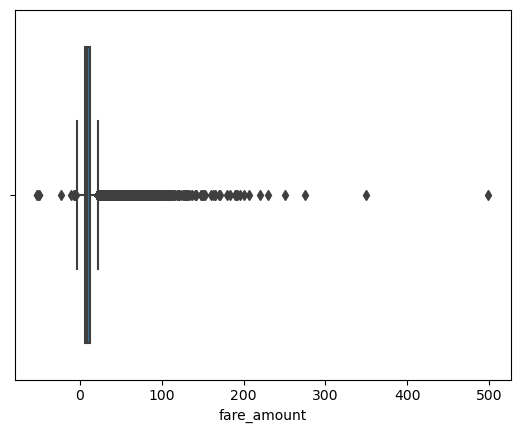

In [6]:
#identify outliers using visualization
sns.boxplot(x=data["fare_amount"])
plt.show()

In [7]:
'''
Quantile is a statistical term that describes the division of a dataset into equal intervals, allowing for the analysis 
of data distribution. The most common quantiles are quartiles, which divide data into four equal parts. The first quartile 
(Q1) represents the 25th percentile, the second quartile (Q2) is the median (50th percentile), and the third quartile (Q3) 
represents the 75th percentile.

The interquartile range (IQR) is a measure of statistical dispersion, calculated as the difference between the third quartile 
(Q3) and the first quartile (Q1). It represents the range within which the central 50% of the data lies and is useful for 
identifying outliers and understanding data variability.
'''

'\nQuantile is a statistical term that describes the division of a dataset into equal intervals, allowing for the analysis \nof data distribution. The most common quantiles are quartiles, which divide data into four equal parts. The first quartile \n(Q1) represents the 25th percentile, the second quartile (Q2) is the median (50th percentile), and the third quartile (Q3) \nrepresents the 75th percentile.\n\nThe interquartile range (IQR) is a measure of statistical dispersion, calculated as the difference between the third quartile \n(Q3) and the first quartile (Q1). It represents the range within which the central 50% of the data lies and is useful for \nidentifying outliers and understanding data variability.\n'

In [8]:
#calculate quantile
Q1=data['fare_amount'].quantile(0.25)
Q3=data['fare_amount'].quantile(0.75)
IQR=Q3-Q1

#define threshold to find outliers
threshold=1.5

lower_bound=Q1-threshold*IQR
upper_bound=Q3+threshold*IQR

In [9]:
#clean data:
data_no_outlier=data[(data['fare_amount']>=lower_bound) & (data['fare_amount']<=upper_bound)]
data_no_outlier

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17
...,...,...,...,...,...,...,...,...,...,...,...
199994,2014-01-31 14:42:00.000000181,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,31,14
199995,2012-10-28 10:49:00.00000053,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10
199996,2014-03-14 01:09:00.0000008,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1
199998,2015-05-20 14:56:25.0000004,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14


In [10]:
#outliers are:
outlier=data[(data['fare_amount']<lower_bound) | (data['fare_amount']>upper_bound)]
outlier

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
6,2014-10-12 07:04:00.0000002,24.50,-73.961447,40.693965,-73.871195,40.774297,5,2014,10,12,7
30,2011-05-21 09:00:00.00000031,25.70,-73.944815,40.834367,-73.989332,40.721920,4,2011,5,21,9
34,2014-06-04 06:49:00.000000102,39.50,-73.788080,40.642187,-73.865042,40.725997,4,2014,6,4,6
39,2014-02-13 17:57:00.000000102,29.00,-73.992600,40.753172,-73.908508,40.816192,1,2014,2,13,17
48,2013-01-03 22:24:41.0000002,56.80,-73.993498,40.764686,-73.993498,40.764686,1,2013,1,3,22
...,...,...,...,...,...,...,...,...,...,...,...
199976,2011-10-18 23:53:00.000000145,49.70,-73.978225,40.783318,-73.700963,40.705852,1,2011,10,18,23
199977,2012-11-20 21:04:30.0000001,43.50,-73.996671,40.737483,-73.867758,40.897563,1,2012,11,20,21
199982,2014-08-06 11:06:06.0000001,57.33,-73.969204,40.754771,-73.790351,40.643802,1,2014,8,6,11
199985,2015-04-18 15:16:06.0000005,24.00,-74.005089,40.737301,-73.945290,40.774162,5,2015,4,18,15


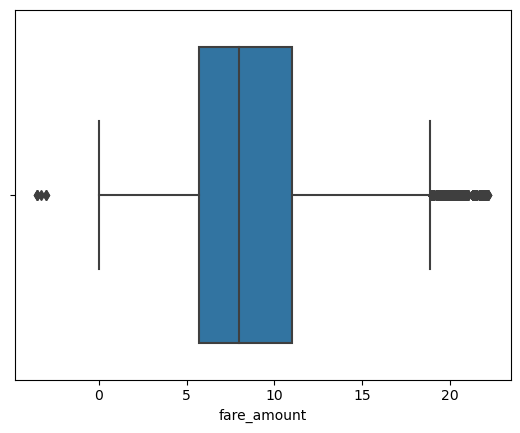

In [11]:
#plot the clean data
sns.boxplot(x=data_no_outlier['fare_amount'])
plt.show()

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
year                    Axes(0.125,0.448049;0.352273x0.0939024)
month                Axes(0.547727,0.448049;0.352273x0.0939024)
day                     Axes(0.125,0.335366;0.352273x0.0939024)
hour                 Axes(0.547727,0.335366;0.352273x0.0939024)
dtype: object

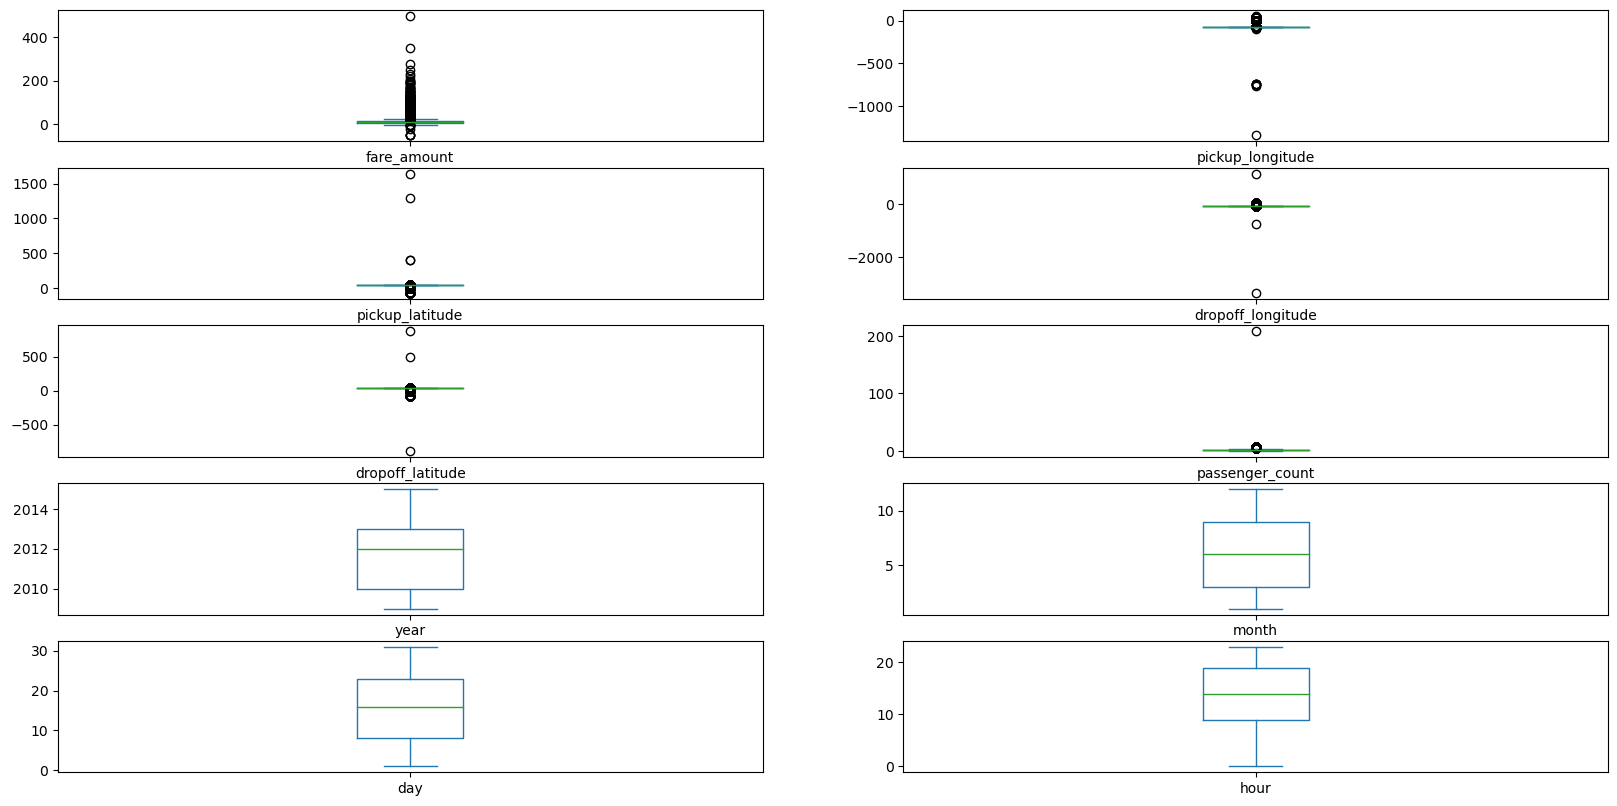

In [12]:
data.plot(kind='box' , subplots=True , layout=(7,2) , figsize=(20,14))

In [13]:
'''
Correlation Matrix:
A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. 
It provides a quantitative measure of the strength and direction of the linear relationships between pairs of variables. 
Each cell in the matrix contains the correlation coefficient, which ranges from -1 to 1. A value of 1 indicates a perfect 
positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Correlation matrices 
are useful for understanding how variables relate to each other, identifying multicollinearity, and guiding feature selection 
in statistical modeling and machine learning.

Heatmap:
A heatmap is a graphical representation of data where individual values are represented by colors. In the context of a 
correlation matrix, a heatmap visually depicts the correlation coefficients, making it easier to identify patterns and 
relationships among variables. In a heatmap, higher correlation values are often represented by darker or more intense 
colors, while lower values are shown in lighter shades. This visual format allows for quick identification of strong positive 
or negative correlations, facilitating the analysis of complex datasets. Heatmaps are widely used in data visualization for 
exploratory data analysis and to communicate insights effectively.
'''

'\nCorrelation Matrix:\nA correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. \nIt provides a quantitative measure of the strength and direction of the linear relationships between pairs of variables. \nEach cell in the matrix contains the correlation coefficient, which ranges from -1 to 1. A value of 1 indicates a perfect \npositive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Correlation matrices \nare useful for understanding how variables relate to each other, identifying multicollinearity, and guiding feature selection \nin statistical modeling and machine learning.\n\nHeatmap:\nA heatmap is a graphical representation of data where individual values are represented by colors. In the context of a \ncorrelation matrix, a heatmap visually depicts the correlation coefficients, making it easier to identify patterns and \nrelationships among variables. In a heatmap, higher correlat

C:\Users\soham\AppData\Local\Temp\ipykernel_12960\4151734440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data_no_outlier.corr()


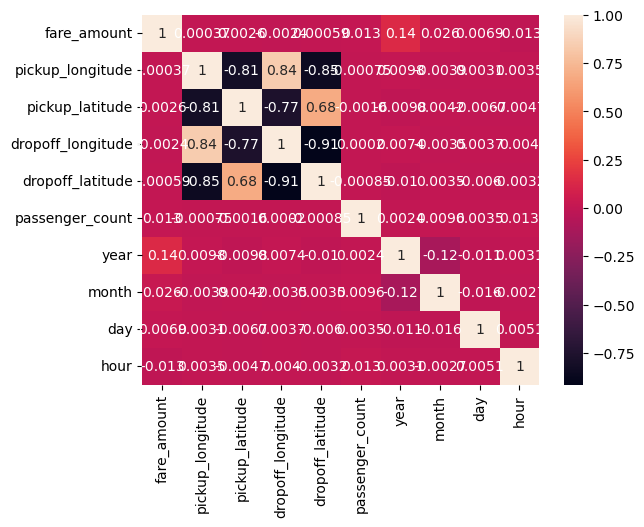

In [14]:
#check correlation
correlation_matrix=data_no_outlier.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [15]:
print(data_no_outlier.columns)


Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour'],
      dtype='object')


In [16]:
y=pd.DataFrame(data_no_outlier['fare_amount'])
y

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
4,16.0
...,...
199994,12.0
199995,3.0
199996,7.5
199998,14.5


In [17]:
x=data_no_outlier.drop(columns=['fare_amount','key'])
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17
...,...,...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,31,14
199995,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10
199996,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1
199998,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14


In [18]:
#split the dataset 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
'''Linear regression is a statistical method used to model the relationship between a dependent variable and one or more 
independent variables, assuming a linear relationship. The model predicts the value of the dependent variable based on the
values of the independent variables and learns the coefficients that best fit the data. It is trained by minimizing the 
difference between predicted and actual values, often using Mean Squared Error (MSE) as a cost function. Key assumptions
include linearity, independence, and homoscedasticity of errors, making it a widely used technique in predictive analytics 
and machine learning.'''

'Linear regression is a statistical method used to model the relationship between a dependent variable and one or more \nindependent variables, assuming a linear relationship. The model predicts the value of the dependent variable based on the\nvalues of the independent variables and learns the coefficients that best fit the data. It is trained by minimizing the \ndifference between predicted and actual values, often using Mean Squared Error (MSE) as a cost function. Key assumptions\ninclude linearity, independence, and homoscedasticity of errors, making it a widely used technique in predictive analytics \nand machine learning.'

In [20]:
lr_model=LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [21]:
'''
R² Score:
The R² score (coefficient of determination) quantifies the proportion of variance in the dependent variable explained 
by independent variables in a regression model. Ranges from 0 to 1, where 0 indicates no explanatory power and 1 signifies
perfect fit. A higher R² score suggests that the model closely matches the data, effectively capturing trends. It’s widely 
used to assess model performance in various applications, helping to identify how well the model generalizes to new data.

RMSE (Root Mean Squared Error):
RMSE (Root Mean Squared Error) measures the average magnitude of prediction errors in a regression model. It’s calculated as 
the square root of the average of the squared differences between actual and predicted values. RMSE is sensitive to outliers,
making it a robust metric for evaluating model accuracy. A lower RMSE indicates a better model fit, as it signifies smaller 
discrepancies between predicted and observed outcomes. It's a popular choice for model evaluation due to its interpretability 
in the same units as the dependent variable.
'''

"\nR² Score:\nThe R² score (coefficient of determination) quantifies the proportion of variance in the dependent variable explained \nby independent variables in a regression model. Ranges from 0 to 1, where 0 indicates no explanatory power and 1 signifies\nperfect fit. A higher R² score suggests that the model closely matches the data, effectively capturing trends. It’s widely \nused to assess model performance in various applications, helping to identify how well the model generalizes to new data.\n\nRMSE (Root Mean Squared Error):\nRMSE (Root Mean Squared Error) measures the average magnitude of prediction errors in a regression model. It’s calculated as \nthe square root of the average of the squared differences between actual and predicted values. RMSE is sensitive to outliers,\nmaking it a robust metric for evaluating model accuracy. A lower RMSE indicates a better model fit, as it signifies smaller \ndiscrepancies between predicted and observed outcomes. It's a popular choice fo

In [27]:
ytrain=ytrain.squeeze()

In [28]:
ytrain.shape

(146266,)

In [29]:
ypred=lr_model.predict(xtest)
r2=r2_score(ytest,ypred)
rmse=np.sqrt(mean_squared_error(ytest,ypred))
r2,rmse

(0.02140512204502054, 4.092282103748309)

In [30]:
'''
Random Forest is an ensemble learning method used for classification and regression. It builds multiple decision trees from 
random samples of the training data, using a technique called bootstrapping. Each tree is created by selecting a random subset 
of features for splitting nodes, which reduces correlation among the trees. Predictions are made by majority voting for
classification or averaging for regression.

Advantages include robustness against overfitting, the ability to handle large datasets, and insights into feature importance.
However, it can be complex and slower to predict compared to individual trees. Random Forest is widely used across various
fields for its effectiveness.'''

'\nRandom Forest is an ensemble learning method used for classification and regression. It builds multiple decision trees from \nrandom samples of the training data, using a technique called bootstrapping. Each tree is created by selecting a random subset \nof features for splitting nodes, which reduces correlation among the trees. Predictions are made by majority voting for\nclassification or averaging for regression.\n\nAdvantages include robustness against overfitting, the ability to handle large datasets, and insights into feature importance.\nHowever, it can be complex and slower to predict compared to individual trees. Random Forest is widely used across various\nfields for its effectiveness.'

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [32]:
ypred_rf=rf_model.predict(xtest)
r2_rf=r2_score(ytest,ypred_rf)
rmse_rf=np.sqrt(mean_squared_error(ytest,ypred_rf))
r2_rf,rmse_rf

(0.7539339964787237, 2.0520592827085316)